In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
import optuna

In [5]:
path = "C:\\Users\\ssriv\\Warlord\\data mining individual\\archive"

In [6]:
file012 = path + "\\diabetes_012_health_indicators_BRFSS2015.csv"
file5050 = path + "\\diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
file3 = path + "\\diabetes_binary_health_indicators_BRFSS2015.csv"

In [7]:
with open (file012) as file:
    file.read()

df012 = pd.read_csv(file012)
print("file012",df012.head())

with open (file5050) as file:
    file.read()

df5050 = pd.read_csv(file5050)
print("file5050",df5050.head())

with open (file3) as file:
    file.read()

df3 = pd.read_csv(file3)
print("file3",df3.head())


file012    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0  

In [8]:
df012.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
df5050.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [10]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
df012.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
df5050.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
df3.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
print("No of duplicates in df012", df012.duplicated().sum())
print("No of duplicates in df5050", df5050.duplicated().sum())
print("No of duplicates in df3", df3.duplicated().sum())

No of duplicates in df012 23899
No of duplicates in df5050 1635
No of duplicates in df3 24206


In [14]:
print("df012 duplicates: ", df012.duplicated().head())

df012 duplicates:  0    False
1    False
2    False
3    False
4    False
dtype: bool


In [15]:
print(df012['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [16]:
df5050_renamed = df5050.rename(columns={'Diabetes_binary': 'Diabetes_012'})
df5050_renamed['Diabetes_012'] = df5050_renamed['Diabetes_012'].replace({1.0: 2.0})

In [17]:
df5050_renamed.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [18]:
merge_012_5050 = pd.concat([df012, df5050_renamed], axis=0, ignore_index=True)

In [19]:
print(f"New dataset shape: {merge_012_5050.shape}")

New dataset shape: (324372, 22)


In [20]:
print(merge_012_5050['Diabetes_012'].value_counts())

Diabetes_012
0.0    249049
2.0     70692
1.0      4631
Name: count, dtype: int64


In [21]:
merge_012_5050.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [22]:
df3_renamed = df3.rename(columns={'Diabetes_binary': 'Diabetes_012'})
df3_renamed['Diabetes_012'] = df3_renamed['Diabetes_012'].replace({1.0: 2.0})

In [23]:
df3_renamed.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [24]:
merge_final = pd.concat([merge_012_5050, df3_renamed], axis=0, ignore_index=True)

In [25]:
print(f"New dataset shape: {merge_final.shape}")

New dataset shape: (578052, 22)


In [26]:
merge_final.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [27]:
print(merge_final['Diabetes_012'].value_counts())

Diabetes_012
0.0    467383
2.0    106038
1.0      4631
Name: count, dtype: int64


In [28]:
merge_012_5050.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [29]:
print("Duplicates: ", merge_final.duplicated())

Duplicates:  0         False
1         False
2         False
3         False
4         False
          ...  
578047     True
578048     True
578049     True
578050     True
578051     True
Length: 578052, dtype: bool


In [30]:
merge_final.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = merge_final.drop(columns=['Diabetes_012'])
y = merge_final['Diabetes_012']

# Define SMOTE strategy: only oversample class 1
smote = SMOTE(
    sampling_strategy={1.0: 80000},  # target count for pre-diabetes
    k_neighbors=5,
    random_state=42
)

X_res, y_res = smote.fit_resample(X, y)

# Rebuild DataFrame
merge_smote = pd.concat(
    [pd.DataFrame(X_res, columns=X.columns),
     pd.Series(y_res, name='Diabetes_012')],
    axis=1
)

# Check distribution
print(merge_smote['Diabetes_012'].value_counts())


Diabetes_012
0.0    467383
2.0    106038
1.0     80000
Name: count, dtype: int64


In [32]:
binary_cols = [
    'HighBP','HighChol','CholCheck','Smoker','Stroke',
    'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
    'AnyHealthcare','NoDocbcCost','DiffWalk','Sex'
]

merge_smote[binary_cols] = merge_smote[binary_cols].round()


In [33]:
merge_smote.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [34]:
df_final = merge_smote

In [35]:
df_final.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [36]:

# Binning BMI into standard categories
df_final['BMI_Cat'] = pd.cut(df_final['BMI'], bins=[0, 18.5, 25, 30, 100], 
                             labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

# Binning Health days (Mental/Physical) into 'None', 'Low', 'High'
bins = [-1, 0, 10, 30]
labels = ['None', 'Low', 'High']
df_final['MentHlth_Cat'] = pd.cut(df_final['MentHlth'], bins=bins, labels=labels)
df_final['PhysHlth_Cat'] = pd.cut(df_final['PhysHlth'], bins=bins, labels=labels)

# Drop the original numerical columns
df_final = df_final.drop(columns=['BMI', 'MentHlth', 'PhysHlth'])

In [37]:
cols_to_fix = ['Diabetes_012', 'HighBP', 'HighChol', 'Smoker', 'Sex']
df_final[cols_to_fix] = df_final[cols_to_fix].astype(str)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_final)

# Ensure the final dataframe is Boolean (required by most Apriori libraries)
df_encoded = df_encoded.astype(bool)

print(df_encoded.head())

   CholCheck  Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0       True   False                 False         False   False     True   
1      False   False                 False          True   False    False   
2       True   False                 False         False    True    False   
3       True   False                 False          True    True     True   
4       True   False                 False          True    True     True   

   HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  ...  \
0              False           True        False     True  ...   
1              False          False         True     True  ...   
2              False           True         True     True  ...   
3              False           True        False     True  ...   
4              False           True        False     True  ...   

   BMI_Cat_Underweight  BMI_Cat_Healthy  BMI_Cat_Overweight  BMI_Cat_Obese  \
0                False            False               False   

In [38]:
df_final.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_012',
       'BMI_Cat', 'MentHlth_Cat', 'PhysHlth_Cat'],
      dtype='object')

In [39]:
# Optional: Select specific features to prevent memory errors
top_features = ['Diabetes_012','HighBP', 'HighChol','Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'GenHlth','DiffWalk', 'Sex', 'Age', 'Income','BMI_Cat', 'MentHlth_Cat', 'PhysHlth_Cat']
df_small = pd.get_dummies(df_final[top_features])

In [40]:
df_small.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Age,Income,...,BMI_Cat_Underweight,BMI_Cat_Healthy,BMI_Cat_Overweight,BMI_Cat_Obese,MentHlth_Cat_None,MentHlth_Cat_Low,MentHlth_Cat_High,PhysHlth_Cat_None,PhysHlth_Cat_Low,PhysHlth_Cat_High
0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,9.0,3.0,...,False,False,False,True,False,False,True,False,False,True
1,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,7.0,1.0,...,False,True,False,False,True,False,False,True,False,False
2,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,9.0,8.0,...,False,False,True,False,False,False,True,False,False,True
3,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0,6.0,...,False,False,True,False,True,False,False,True,False,False
4,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0,4.0,...,False,True,False,False,False,True,False,True,False,False


In [41]:
df_small.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Income',
       'Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0',
       'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0', 'HighChol_1.0',
       'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0', 'Sex_1.0', 'BMI_Cat_Underweight',
       'BMI_Cat_Healthy', 'BMI_Cat_Overweight', 'BMI_Cat_Obese',
       'MentHlth_Cat_None', 'MentHlth_Cat_Low', 'MentHlth_Cat_High',
       'PhysHlth_Cat_None', 'PhysHlth_Cat_Low', 'PhysHlth_Cat_High'],
      dtype='object')

In [42]:
df_small['Age'].dtype

dtype('float64')

In [43]:
df_small.dtypes

Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
DiffWalk                float64
Age                     float64
Income                  float64
Diabetes_012_0.0           bool
Diabetes_012_1.0           bool
Diabetes_012_2.0           bool
HighBP_0.0                 bool
HighBP_1.0                 bool
HighChol_0.0               bool
HighChol_1.0               bool
Smoker_0.0                 bool
Smoker_1.0                 bool
Sex_0.0                    bool
Sex_1.0                    bool
BMI_Cat_Underweight        bool
BMI_Cat_Healthy            bool
BMI_Cat_Overweight         bool
BMI_Cat_Obese              bool
MentHlth_Cat_None          bool
MentHlth_Cat_Low           bool
MentHlth_Cat_High          bool
PhysHlth_Cat_None          bool
PhysHlth_Cat_Low           bool
PhysHlth_Cat_High          bool
dtype: o

In [44]:
# 1. Create a clean copy
df_fix = df_small.copy()

# 2. ROUND the values created by SMOTE back to integers
# This collapses Income_7.999... and Income_8.000... back into just "8"
cols_to_fix = ['GenHlth', 'Age', 'Income']
for col in cols_to_fix:
    df_fix[col] = df_fix[col].round().astype(int)

# 3. Now One-Hot Encode (this will result in ~30 columns, not 74,000!)
df_assoc = pd.get_dummies(df_fix, columns=cols_to_fix, prefix=cols_to_fix)

# 4. Final check - all columns to boolean for Association Rules
df_assoc = df_assoc.astype(bool)

print(f"Success! New shape: {df_assoc.shape}")

Success! New shape: (653421, 54)


In [45]:
df_assoc.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Diabetes_012_0.0,Diabetes_012_1.0,Diabetes_012_2.0,...,Age_12,Age_13,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [46]:
"""df_assoc_final = df_assoc.drop(
    columns=['Diabetes_012_0.0', 'Diabetes_012_1.0']
)"""


"df_assoc_final = df_assoc.drop(\n    columns=['Diabetes_012_0.0', 'Diabetes_012_1.0']\n)"

In [47]:
df_assoc.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Diabetes_012_0.0,Diabetes_012_1.0,Diabetes_012_2.0,...,Age_12,Age_13,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,False,False,False,False,True,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [48]:
df_assoc_final = df_assoc

In [49]:
support = df_assoc_final.mean()
df_assoc_final = df_assoc_final[support[support > 0.01].index]


In [50]:
df_assoc_sample = df_assoc_final.sample(
    frac=0.2,
    random_state=42
)


In [51]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_itemsets = fpgrowth(
    df_assoc_sample,
    min_support=0.02,
    use_colnames=True,
    max_len=3   # ↓ reduce length
)


In [52]:
diabetes_cols = ['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']

diabetes_itemsets = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: any(d in x for d in diabetes_cols))
]

diabetes_itemsets


,support,itemsets
2,0.713102,(Diabetes_012_0.0)
31,0.162614,(Diabetes_012_2.0)
47,0.124285,(Diabetes_012_1.0)
53,0.584922,"(Diabetes_012_0.0, Veggies)"
54,0.554077,"(Diabetes_012_0.0, PhysActivity)"
...,...,...
4916,0.020997,"(Age_3, Diabetes_012_0.0, MentHlth_Cat_None)"
4917,0.024479,"(Diabetes_012_0.0, Age_2)"
4922,0.021632,"(Diabetes_012_0.0, HighBP_0.0, Age_2)"
4923,0.021548,"(Diabetes_012_0.0, HighChol_0.0, Age_2)"


In [53]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1.2
)


In [54]:
# List of diabetes classes
diabetes_classes = ['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']

# Filter rules where the consequents contain any diabetes class
diabetes_rules = rules[
    rules['consequents'].apply(lambda x: any(d in x for d in diabetes_classes))
]

# Sort by lift and confidence (descending)
diabetes_rules = diabetes_rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Show top 10
diabetes_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3642,(PhysHlth_Cat_High),"(Diabetes_012_0.0, GenHlth_5)",0.150807,0.024846,0.020890,0.138522,5.575197,1.0,0.017143,1.131955,0.966369,0.134981,0.116573,0.489649
3643,(GenHlth_5),"(Diabetes_012_0.0, PhysHlth_Cat_High)",0.053955,0.080423,0.020890,0.387179,4.814283,1.0,0.016551,1.500564,0.837470,0.184074,0.333584,0.323466
2765,(DiffWalk),"(PhysHlth_Cat_High, Diabetes_012_2.0)",0.188470,0.043226,0.030509,0.161876,3.744835,1.0,0.022362,1.141565,0.903190,0.151643,0.124010,0.433832
2763,(PhysHlth_Cat_High),"(Diabetes_012_2.0, DiffWalk)",0.150807,0.060191,0.030509,0.202304,3.361028,1.0,0.021432,1.178154,0.827223,0.169034,0.151214,0.354584
2947,(MentHlth_Cat_High),"(Diabetes_012_0.0, PhysHlth_Cat_High)",0.107481,0.080423,0.026055,0.242418,3.014284,1.0,0.017411,1.213831,0.748719,0.160985,0.176162,0.283197
2790,(PhysHlth_Cat_High),"(Diabetes_012_0.0, DiffWalk)",0.150807,0.095903,0.043257,0.286838,2.990913,1.0,0.028794,1.267730,0.783866,0.212615,0.211188,0.368944
2791,(DiffWalk),"(Diabetes_012_0.0, PhysHlth_Cat_High)",0.188470,0.080423,0.043257,0.229517,2.853871,1.0,0.028100,1.193507,0.800462,0.191712,0.162133,0.383693
1353,(DiffWalk),"(GenHlth_4, Diabetes_012_2.0)",0.188470,0.044971,0.023438,0.124361,2.765345,1.0,0.014963,1.090665,0.786639,0.111609,0.083128,0.322772
1351,(GenHlth_4),"(Diabetes_012_2.0, DiffWalk)",0.142030,0.060191,0.023438,0.165023,2.741663,1.0,0.014889,1.125551,0.740419,0.131099,0.111547,0.277210
2946,(PhysHlth_Cat_High),"(Diabetes_012_0.0, MentHlth_Cat_High)",0.150807,0.064591,0.026055,0.172772,2.674872,1.0,0.016314,1.130776,0.737347,0.137609,0.115652,0.288080


In [55]:
# Filter strong rules
strong_diabetes_rules = diabetes_rules[
    (diabetes_rules["lift"] > 2.0) &
    (diabetes_rules["confidence"] > 0.4)
]

strong_diabetes_rules[["antecedents", "consequents", "support", "confidence", "lift"]]


,antecedents,consequents,support,confidence,lift


In [56]:
df_assoc_sample.shape

(130684, 54)

In [57]:
df_assoc_sample.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'Diabetes_012_0.0', 'Diabetes_012_1.0',
       'Diabetes_012_2.0', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0', 'Sex_1.0',
       'BMI_Cat_Underweight', 'BMI_Cat_Healthy', 'BMI_Cat_Overweight',
       'BMI_Cat_Obese', 'MentHlth_Cat_None', 'MentHlth_Cat_Low',
       'MentHlth_Cat_High', 'PhysHlth_Cat_None', 'PhysHlth_Cat_Low',
       'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2', 'GenHlth_3', 'GenHlth_4',
       'GenHlth_5', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6',
       'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13',
       'Income_1', 'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6',
       'Income_7', 'Income_8'],
      dtype='object')

In [58]:
X = df_assoc_sample.drop(
    columns=[col for col in df_assoc_sample.columns if 'Diabetes_012' in col]
)


In [59]:
X.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'HighBP_0.0', 'HighBP_1.0',
       'HighChol_0.0', 'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0',
       'Sex_1.0', 'BMI_Cat_Underweight', 'BMI_Cat_Healthy',
       'BMI_Cat_Overweight', 'BMI_Cat_Obese', 'MentHlth_Cat_None',
       'MentHlth_Cat_Low', 'MentHlth_Cat_High', 'PhysHlth_Cat_None',
       'PhysHlth_Cat_Low', 'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8'],
      dtype='object')

In [60]:
from sklearn.decomposition import PCA
import pandas as pd

# X is your feature matrix (all columns except diabetes)
# Optional: scale continuous numeric columns if any (none in your X)
# Binary features are fine as-is

pca = PCA(n_components=2)  # 2D for visualization
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])



In [61]:

# Add diabetes label for coloring
X_pca_df['Diabetes'] = df_assoc_sample['Diabetes_012_0.0']  # 0 or 1

In [62]:
X_pca_df['Diabetes1'] = df_assoc_sample['Diabetes_012_1.0']

In [63]:
X_pca_df['Diabetes2'] = df_assoc_sample['Diabetes_012_2.0']

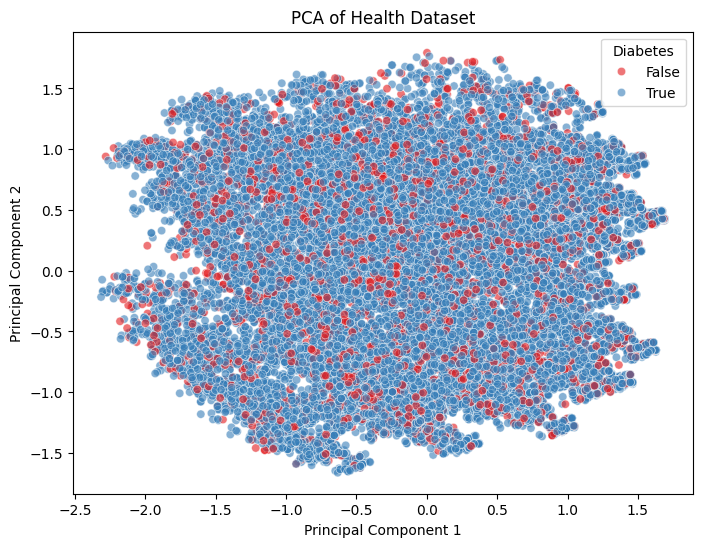

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Diabetes', data=X_pca_df, palette='Set1', alpha=0.6)
plt.title("PCA of Health Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


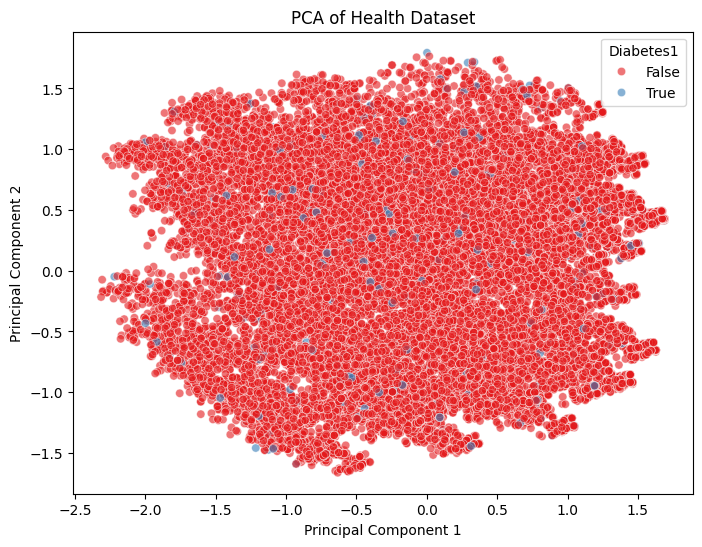

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Diabetes1', data=X_pca_df, palette='Set1', alpha=0.6)
plt.title("PCA of Health Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


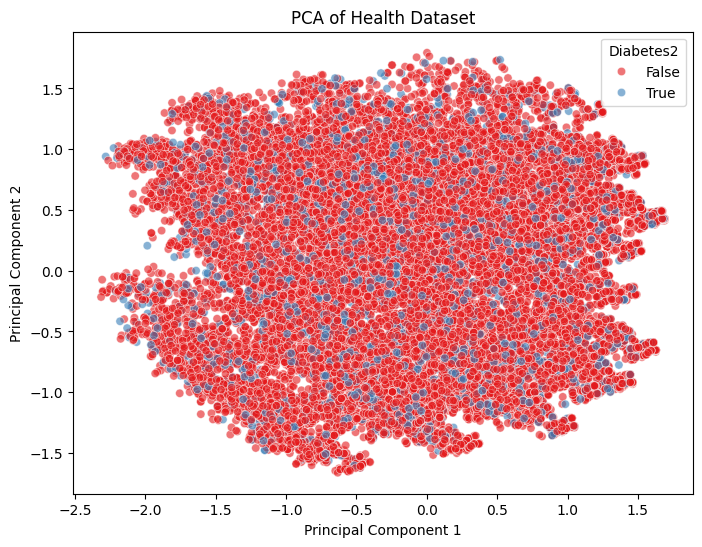

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Diabetes2', data=X_pca_df, palette='Set1', alpha=0.6)
plt.title("PCA of Health Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [67]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.12153663 0.08154054]
Cumulative variance: [0.12153663 0.20307717]


In [68]:
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2'])
print(loadings.sort_values(by='PC1', ascending=False))



                           PC1       PC2
HighBP_0.0            0.386580  0.075155
HighChol_0.0          0.339097  0.072942
PhysHlth_Cat_None     0.231464 -0.266588
Smoker_0.0            0.206885  0.178898
Income_8              0.178395 -0.114265
BMI_Cat_Healthy       0.171551  0.089060
GenHlth_2             0.160043 -0.086896
PhysActivity          0.150710 -0.071247
GenHlth_1             0.142465 -0.023500
MentHlth_Cat_None     0.112369 -0.277358
Fruits                0.087778  0.041135
Veggies               0.072507  0.010819
Sex_0.0               0.030909  0.540778
Age_5                 0.030169  0.011529
Age_4                 0.029085  0.008119
Age_3                 0.027970  0.007723
Age_6                 0.023814  0.011917
Age_2                 0.021098  0.006081
Age_1                 0.018228  0.005858
Age_7                 0.012869  0.011226
Income_7              0.009912 -0.018615
BMI_Cat_Overweight    0.005975 -0.176077
BMI_Cat_Underweight   0.001766  0.007370
HvyAlcoholConsum

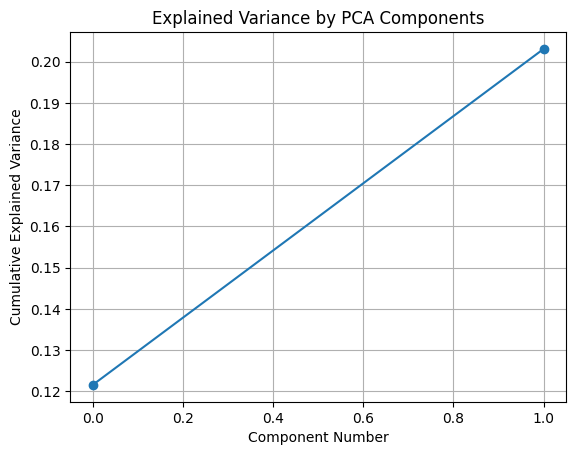

In [69]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

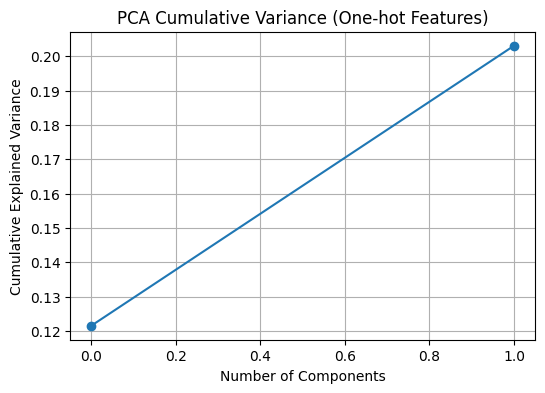

In [70]:
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.plot(explained_var.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance (One-hot Features)")
plt.grid(True)
plt.show()


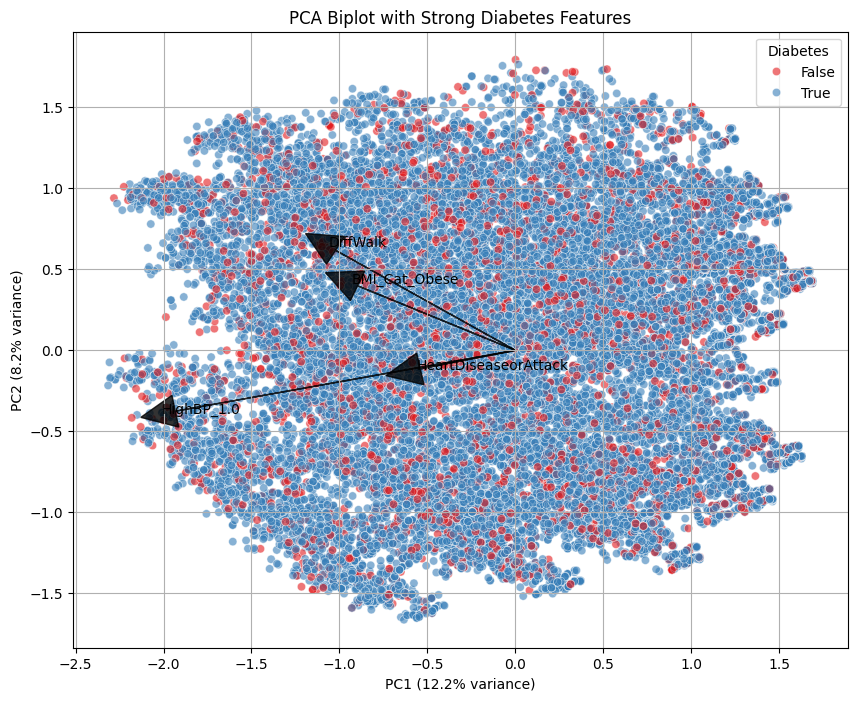

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your strong diabetes-related features from rules
strong_features1 = ['DiffWalk', 'BMI_Cat_Obese', 'HeartDiseaseorAttack', 'HighBP_1.0']

plt.figure(figsize=(10,8))

# Scatter plot of the PCA-transformed data
sns.scatterplot(
    x=X_pca_df['PC1'],
    y=X_pca_df['PC2'],
    hue=X_pca_df['Diabetes'],  # color by diabetes type
    palette='Set1',
    alpha=0.6
)

# Add arrows for feature loadings
for feature in strong_features1:
    plt.arrow(
        0, 0,                               # origin
        pca.components_[0, X.columns.get_loc(feature)]*5,  # scale for visibility
        pca.components_[1, X.columns.get_loc(feature)]*5,
        color='black', alpha=0.8, head_width=0.2, head_length=0.2
    )
    plt.text(
        pca.components_[0, X.columns.get_loc(feature)]*5.2,
        pca.components_[1, X.columns.get_loc(feature)]*5.2,
        feature,
        color='black',
        fontsize=10
    )

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.title("PCA Biplot with Strong Diabetes Features")
plt.grid(True)
plt.show()


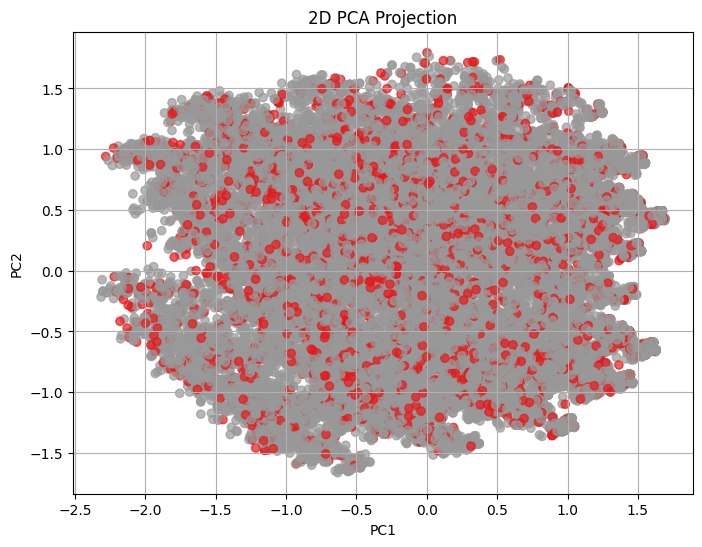

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2-component PCA
pca_2 = PCA(n_components=2)
X_pca_ = pca_2.fit_transform(X)  # X = your feature matrix

# Scatter plot using your diabetes labels
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_[:, 0], 
    X_pca_[:, 1], 
    c=X_pca_df['Diabetes'],  # <- use your label column
    cmap='Set1', 
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()


c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\setuptools\_distutils\version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\ssriv\anaconda3\envs\warlord\lib\site-packages\setuptools\_distutils\version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


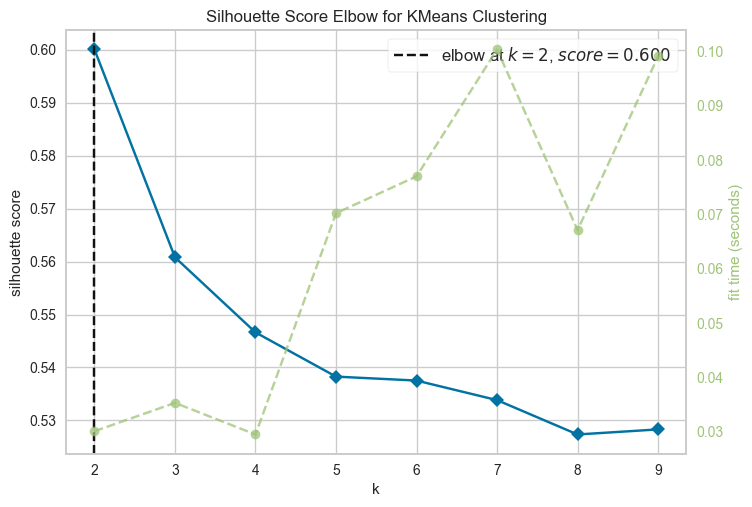

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [73]:
num_components = np.argmax(explained_var >= 0.85) + 1
scores = pca.transform(X)[:, :num_components]

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')  # can use 'distortion' too
visualizer.fit(scores)
visualizer.show()


In [74]:
X_pca_df.head()

,PC1,PC2,Diabetes,Diabetes1,Diabetes2
0,0.344494,-0.385467,NaN,NaN,NaN
1,0.396769,-0.278447,NaN,NaN,NaN
2,0.079312,1.139933,True,False,False
3,0.374278,-0.908603,NaN,NaN,NaN
4,-1.378211,-1.090187,NaN,NaN,NaN


In [75]:
X.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,Age_12,Age_13,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
3265,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
33177,False,False,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
531447,True,False,True,True,True,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
423161,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
45026,False,False,True,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [76]:
X.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'HighBP_0.0', 'HighBP_1.0',
       'HighChol_0.0', 'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0',
       'Sex_1.0', 'BMI_Cat_Underweight', 'BMI_Cat_Healthy',
       'BMI_Cat_Overweight', 'BMI_Cat_Obese', 'MentHlth_Cat_None',
       'MentHlth_Cat_Low', 'MentHlth_Cat_High', 'PhysHlth_Cat_None',
       'PhysHlth_Cat_Low', 'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8'],
      dtype='object')

In [77]:
X.isna().sum()

Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
DiffWalk                0
HighBP_0.0              0
HighBP_1.0              0
HighChol_0.0            0
HighChol_1.0            0
Smoker_0.0              0
Smoker_1.0              0
Sex_0.0                 0
Sex_1.0                 0
BMI_Cat_Underweight     0
BMI_Cat_Healthy         0
BMI_Cat_Overweight      0
BMI_Cat_Obese           0
MentHlth_Cat_None       0
MentHlth_Cat_Low        0
MentHlth_Cat_High       0
PhysHlth_Cat_None       0
PhysHlth_Cat_Low        0
PhysHlth_Cat_High       0
GenHlth_1               0
GenHlth_2               0
GenHlth_3               0
GenHlth_4               0
GenHlth_5               0
Age_1                   0
Age_2                   0
Age_3                   0
Age_4                   0
Age_5                   0
Age_6                   0
Age_7                   0
Age_8                   0
Age_9       

In [78]:
df_assoc_sample.dtypes

Stroke                  bool
HeartDiseaseorAttack    bool
PhysActivity            bool
Fruits                  bool
Veggies                 bool
HvyAlcoholConsump       bool
DiffWalk                bool
Diabetes_012_0.0        bool
Diabetes_012_1.0        bool
Diabetes_012_2.0        bool
HighBP_0.0              bool
HighBP_1.0              bool
HighChol_0.0            bool
HighChol_1.0            bool
Smoker_0.0              bool
Smoker_1.0              bool
Sex_0.0                 bool
Sex_1.0                 bool
BMI_Cat_Underweight     bool
BMI_Cat_Healthy         bool
BMI_Cat_Overweight      bool
BMI_Cat_Obese           bool
MentHlth_Cat_None       bool
MentHlth_Cat_Low        bool
MentHlth_Cat_High       bool
PhysHlth_Cat_None       bool
PhysHlth_Cat_Low        bool
PhysHlth_Cat_High       bool
GenHlth_1               bool
GenHlth_2               bool
GenHlth_3               bool
GenHlth_4               bool
GenHlth_5               bool
Age_1                   bool
Age_2         

In [79]:
diabetes_cols = [
    'Diabetes_012_0.0',
    'Diabetes_012_1.0',
    'Diabetes_012_2.0'
]

y_clean = (
    df_assoc_sample[diabetes_cols]
    .idxmax(axis=1)
    .str.replace('Diabetes_012_', '', regex=False)
    .astype(float)
    .astype(int)
)
print(y_clean.value_counts())



0    93191
2    21251
1    16242
Name: count, dtype: int64


In [80]:
X_clean = df_assoc_sample.drop(columns=diabetes_cols).astype(int)


In [81]:
X.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,Age_12,Age_13,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
3265,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
33177,False,False,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
531447,True,False,True,True,True,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
423161,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
45026,False,False,True,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

        Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
626888       0                     1             1       0        1   
340965       0                     0             1       1        1   
45654        1                     0             1       1        1   
91689        0                     0             1       1        1   
236884       0                     0             1       1        1   

        HvyAlcoholConsump  DiffWalk  HighBP_0.0  HighBP_1.0  HighChol_0.0  \
626888                  0         0           1           0             0   
340965                  0         1           1           0             1   
45654                   0         1           0           1             0   
91689                   0         0           1           0             1   
236884                  1         0           1           0             1   

        ...  Age_12  Age_13  Income_1  Income_2  Income_3  Income_4  Income_5  \
626888  ...       0       0  

In [83]:
def objective1(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 1600)
    max_depth = trial.suggest_int('max_depth', 2, 64, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model1 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1, 
    )
    
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    
    # Optimize for F1-Score (balances precision and recall)
    return f1_score(y_test, y_pred, average='weighted')

# Direction is 'maximize' because we want the highest F1-score
study1 = optuna.create_study(direction='maximize', study_name="RF_Classification_Optimisation")
study1.optimize(objective1, n_trials=100, show_progress_bar=True)

best_rf1 = RandomForestClassifier(**study1.best_params, random_state=42, n_jobs=-1)
best_rf1.fit(X_train, y_train)
y_pred_best1 = best_rf1.predict(X_test)



[I 2026-01-20 01:37:16,317] A new study created in memory with name: RF_Classification_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-20 01:37:18,431] Trial 0 finished with value: 0.6317803954486264 and parameters: {'n_estimators': 575, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.6317803954486264.
[I 2026-01-20 01:37:23,674] Trial 1 finished with value: 0.655781022743345 and parameters: {'n_estimators': 1134, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.655781022743345.
[I 2026-01-20 01:37:27,198] Trial 2 finished with value: 0.6639403015409807 and parameters: {'n_estimators': 812, 'max_depth': 22, 'min_samples_split': 8, 'min_samples_leaf': 11}. Best is trial 2 with value: 0.6639403015409807.
[I 2026-01-20 01:37:31,099] Trial 3 finished with value: 0.672833093241144 and parameters: {'n_estimators': 835, 'max_depth': 28, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.672833093241144.
[I 2026-01-20 01:37:32,301] Trial 4 finished with value: 0.6526186512520665 and parameters: 

In [84]:

best_mae1 = mean_absolute_error(y_test, y_pred_best1)
best_rmse1 = np.sqrt(mean_squared_error(y_test, y_pred_best1))
best_f1_1 = f1_score(y_test, y_pred_best1,average='weighted')

print("\n Best Parameters Found:")
print(study1.best_params)
print(f"MAE: {best_mae1:.3f}, RMSE: {best_rmse1:.3f}, f1_score: {best_f1_1:.3f}")



 Best Parameters Found:
{'n_estimators': 1068, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1}
MAE: 0.313, RMSE: 0.746, f1_score: 0.799


In [85]:

print("Best Parameters Found:")
print(study1.best_params)

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred_best1))

print("\nWeighted F1-score:")
print(f1_score(y_test, y_pred_best1, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best1))

Best Parameters Found:
{'n_estimators': 1068, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1}

Accuracy:
0.8090829092856869

Weighted F1-score:
0.7987004117478234

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18638
           1       0.77      0.64      0.70      3249
           2       0.63      0.45      0.52      4250

    accuracy                           0.81     26137
   macro avg       0.75      0.67      0.70     26137
weighted avg       0.80      0.81      0.80     26137


Confusion Matrix:
[[17188   483   967]
 [ 1018  2064   167]
 [ 2216   139  1895]]


Text(95.72222222222221, 0.5, 'Truth')

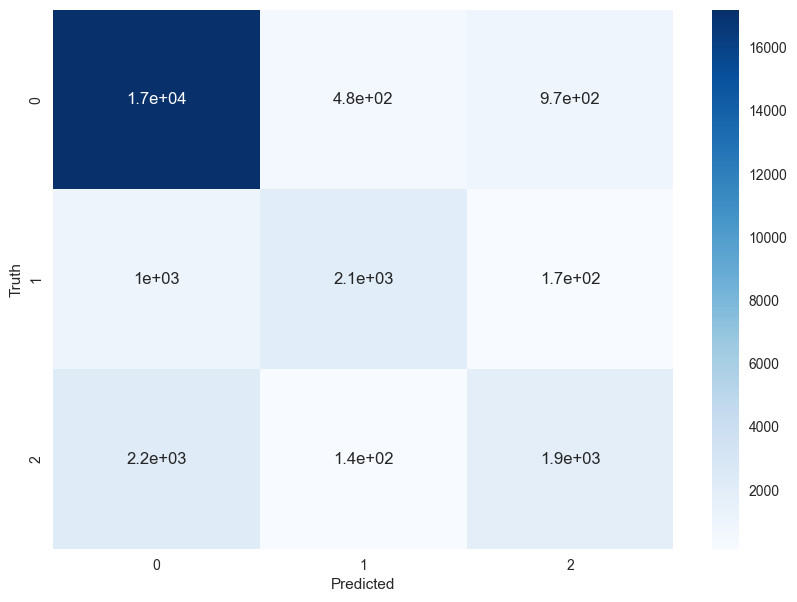

In [86]:
cm = confusion_matrix(y_test, y_pred_best1)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
diabetes_cols = ['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']

# Count of True values in each column
diabetes_counts = df_assoc_sample[diabetes_cols].sum()
print(diabetes_counts)


Diabetes_012_0.0    93191
Diabetes_012_1.0    16242
Diabetes_012_2.0    21251
dtype: int64


In [88]:
df_assoc_sample.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'Diabetes_012_0.0', 'Diabetes_012_1.0',
       'Diabetes_012_2.0', 'HighBP_0.0', 'HighBP_1.0', 'HighChol_0.0',
       'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0', 'Sex_1.0',
       'BMI_Cat_Underweight', 'BMI_Cat_Healthy', 'BMI_Cat_Overweight',
       'BMI_Cat_Obese', 'MentHlth_Cat_None', 'MentHlth_Cat_Low',
       'MentHlth_Cat_High', 'PhysHlth_Cat_None', 'PhysHlth_Cat_Low',
       'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2', 'GenHlth_3', 'GenHlth_4',
       'GenHlth_5', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6',
       'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13',
       'Income_1', 'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6',
       'Income_7', 'Income_8'],
      dtype='object')

In [90]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Select features and target
X_smote = df_assoc_sample.drop(columns=['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0'])
y_smote = df_assoc_sample[['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']].idxmax(axis=1)

# Convert target to numeric labels
y_smote = y_smote.str.replace('Diabetes_012_', '').astype(float).astype(int)

# Convert boolean features to integers (0/1)
X_smote = X_smote.astype(int)

# Check original class distribution
print("Original class distribution:")
print(y_smote.value_counts())

# Define SMOTE strategy for minority classes
smote = SMOTE(
    sampling_strategy={1: 100000, 2: 100000},  # oversample pre-diabetes and type-2 diabetes
    k_neighbors=5,
    random_state=42
)

# Fit and resample
X_res, y_res = smote.fit_resample(X_smote, y_smote)

# Convert back to DataFrame
df_resampled = pd.concat(
    [pd.DataFrame(X_res, columns=X_smote.columns),
     pd.Series(y_res, name='Diabetes_012')],
    axis=1
)

# Check new distribution
print("\nResampled class distribution:")
print(df_resampled['Diabetes_012'].value_counts())


Original class distribution:
0    93191
2    21251
1    16242
Name: count, dtype: int64

Resampled class distribution:
Diabetes_012
2    100000
1    100000
0     93191
Name: count, dtype: int64


In [91]:
df_resampled.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'HighBP_0.0', 'HighBP_1.0',
       'HighChol_0.0', 'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0',
       'Sex_1.0', 'BMI_Cat_Underweight', 'BMI_Cat_Healthy',
       'BMI_Cat_Overweight', 'BMI_Cat_Obese', 'MentHlth_Cat_None',
       'MentHlth_Cat_Low', 'MentHlth_Cat_High', 'PhysHlth_Cat_None',
       'PhysHlth_Cat_Low', 'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8',
       'Diabetes_012'],
      dtype='object')

In [92]:
# One-hot encode Diabetes_012
diabetes_onehot = pd.get_dummies(df_resampled['Diabetes_012'], prefix='Diabetes_012')

# Rename dummy columns to match previous naming convention
diabetes_onehot.columns = ['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']

# Combine with features
df_resampled_onehot = pd.concat([df_resampled.drop(columns=['Diabetes_012']), diabetes_onehot], axis=1)

# Check distribution
print(df_resampled_onehot[['Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0']].sum())



Diabetes_012_0.0     93191
Diabetes_012_1.0    100000
Diabetes_012_2.0    100000
dtype: int64


In [93]:
df_resampled_onehot.columns

Index(['Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk', 'HighBP_0.0', 'HighBP_1.0',
       'HighChol_0.0', 'HighChol_1.0', 'Smoker_0.0', 'Smoker_1.0', 'Sex_0.0',
       'Sex_1.0', 'BMI_Cat_Underweight', 'BMI_Cat_Healthy',
       'BMI_Cat_Overweight', 'BMI_Cat_Obese', 'MentHlth_Cat_None',
       'MentHlth_Cat_Low', 'MentHlth_Cat_High', 'PhysHlth_Cat_None',
       'PhysHlth_Cat_Low', 'PhysHlth_Cat_High', 'GenHlth_1', 'GenHlth_2',
       'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8',
       'Diabetes_012_0.0', 'Diabetes_012_1.0', 'Diabetes_012_2.0'],
      dtype='object')

In [94]:
df_resampled_onehot.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Diabetes_012_0.0,Diabetes_012_1.0,Diabetes_012_2.0
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,True,False,False
1,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,True,False,False
2,1,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,True,False,False
3,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,True,False,False
4,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,False,False,True


In [95]:
diabetes_cols = [
    'Diabetes_012_0.0',
    'Diabetes_012_1.0',
    'Diabetes_012_2.0'
]

y_clean1 = (
    df_resampled_onehot[diabetes_cols]
    .idxmax(axis=1)
    .str.replace('Diabetes_012_', '', regex=False)
    .astype(float)
    .astype(int)
)
print(y_clean1.value_counts())



2    100000
1    100000
0     93191
Name: count, dtype: int64


In [96]:
X_clean1 = df_resampled_onehot.drop(columns=diabetes_cols).astype(int)


In [97]:
X_clean1.head()

,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,HighBP_0.0,HighBP_1.0,HighChol_0.0,...,Age_12,Age_13,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_clean1, y_clean1,
    test_size=0.2,
    random_state=42,
    stratify=y_clean1
)
print(X_train2.head())
print(X_test2.head())
print(y_train2.head())
print(y_test2.head())

        Stroke  HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
210308       0                     0             1       1        0   
284406       0                     0             0       1        1   
224986       0                     0             1       1        1   
277358       0                     1             0       0        1   
36181        0                     1             1       1        1   

        HvyAlcoholConsump  DiffWalk  HighBP_0.0  HighBP_1.0  HighChol_0.0  \
210308                  0         0           1           0             0   
284406                  0         0           1           0             0   
224986                  0         0           1           0             1   
277358                  0         0           0           1             1   
36181                   0         1           1           0             0   

        ...  Age_12  Age_13  Income_1  Income_2  Income_3  Income_4  Income_5  \
210308  ...       0       0  

In [99]:
y_train2

210308    1
284406    2
224986    2
277358    2
36181     0
         ..
11301     2
80754     1
183304    1
258272    2
168676    1
Length: 234552, dtype: int32

In [100]:
def objective2(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 1600)
    max_depth = trial.suggest_int('max_depth', 2, 64, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    model2 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1, 
    )
    
    model2.fit(X_train2, y_train2)
    y_pred2 = model2.predict(X_test2)
    
    # Optimize for F1-Score (balances precision and recall)
    return f1_score(y_test2, y_pred2, average='weighted')

# Direction is 'maximize' because we want the highest F1-score
study2 = optuna.create_study(direction='maximize', study_name="RF_Classification_Optimisation")
study2.optimize(objective2, n_trials=100, show_progress_bar=True)

best_rf2 = RandomForestClassifier(**study2.best_params, random_state=42, n_jobs=-1)
best_rf2.fit(X_train2, y_train2)
y_pred_best2 = best_rf2.predict(X_test2)



[I 2026-01-20 01:46:22,378] A new study created in memory with name: RF_Classification_Optimisation


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-20 01:46:31,750] Trial 0 finished with value: 0.8112391020374727 and parameters: {'n_estimators': 622, 'max_depth': 34, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8112391020374727.
[I 2026-01-20 01:46:44,378] Trial 1 finished with value: 0.5305910657887998 and parameters: {'n_estimators': 1378, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8112391020374727.
[I 2026-01-20 01:46:47,148] Trial 2 finished with value: 0.5473905430325042 and parameters: {'n_estimators': 280, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8112391020374727.
[I 2026-01-20 01:46:55,149] Trial 3 finished with value: 0.4529838697385152 and parameters: {'n_estimators': 1371, 'max_depth': 2, 'min_samples_split': 14, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.8112391020374727.
[I 2026-01-20 01:47:06,097] Trial 4 finished with value: 0.4936575006823267 and paramete

In [101]:

best_mae2 = mean_absolute_error(y_test2, y_pred_best2)
best_rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred_best2))
best_f1_2 = f1_score(y_test2, y_pred_best2,average='weighted')

print("\n Best Parameters Found:")
print(study2.best_params)
print(f"MAE: {best_mae2:.3f}, RMSE: {best_rmse2:.3f}, f1_score: {best_f1_2:.3f}")



 Best Parameters Found:
{'n_estimators': 1507, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}
MAE: 0.165, RMSE: 0.533, f1_score: 0.894


In [102]:

print("Best Parameters Found:")
print(study2.best_params)

print("\nAccuracy:")
print(accuracy_score(y_test2, y_pred_best2))

print("\nWeighted F1-score:")
print(f1_score(y_test2, y_pred_best2, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred_best2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred_best2))

Best Parameters Found:
{'n_estimators': 1507, 'max_depth': 42, 'min_samples_split': 3, 'min_samples_leaf': 1}

Accuracy:
0.8944388546871536

Weighted F1-score:
0.8937097136196257

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     18639
           1       0.92      0.95      0.93     20000
           2       0.86      0.92      0.89     20000

    accuracy                           0.89     58639
   macro avg       0.90      0.89      0.89     58639
weighted avg       0.90      0.89      0.89     58639


Confusion Matrix:
[[15155  1045  2439]
 [  455 18972   573]
 [ 1047   631 18322]]


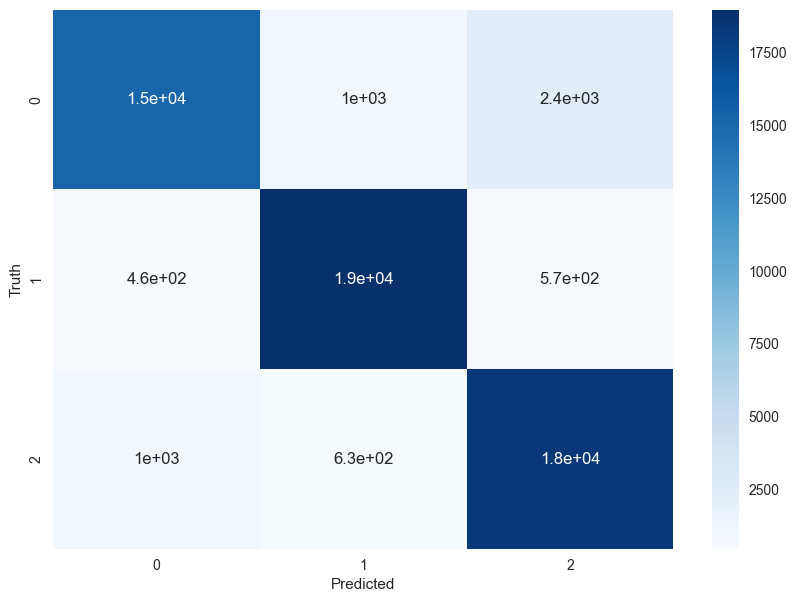

In [104]:
cm1 = confusion_matrix(y_test2, y_pred_best2)
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [105]:

importances2 = pd.Series(
    best_rf2.feature_importances_,
    index=X_train2.columns
).sort_values(ascending=False)

importances2.head(15)


Fruits               0.047923
Veggies              0.039119
PhysActivity         0.033191
Smoker_1.0           0.028598
Smoker_0.0           0.028544
HighBP_0.0           0.027740
Age_9                0.026781
Sex_0.0              0.026038
DiffWalk             0.025270
Sex_1.0              0.025189
Income_6             0.025053
Age_10               0.024915
Income_8             0.024378
GenHlth_1            0.024158
MentHlth_Cat_None    0.023876
dtype: float64

In [106]:
from sklearn.metrics import roc_auc_score

y_proba2 = best_rf2.predict_proba(X_test2)
roc_auc2 = roc_auc_score(y_test2, y_proba2, multi_class='ovr', average='weighted')
print("roc_auc2: ",roc_auc2)


roc_auc2:  0.9745780021354659


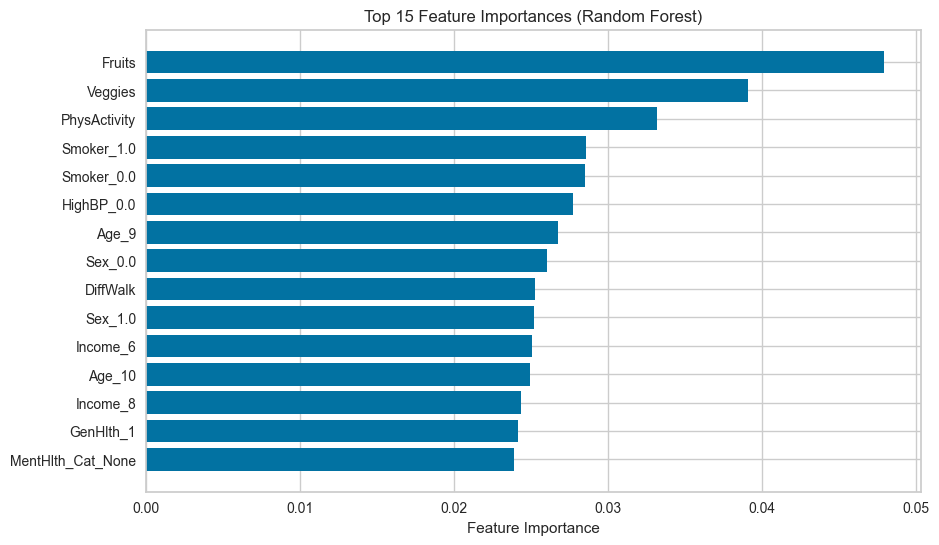

In [107]:

# Feature importance
importances2 = best_rf2.feature_importances_
feature_names2 = X_train2.columns

fi_df = pd.DataFrame({
    'Feature': feature_names2,
    'Importance': importances2
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
plt.barh(
    fi_df['Feature'][:15][::-1],
    fi_df['Importance'][:15][::-1]
)
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.grid(True)
plt.show()


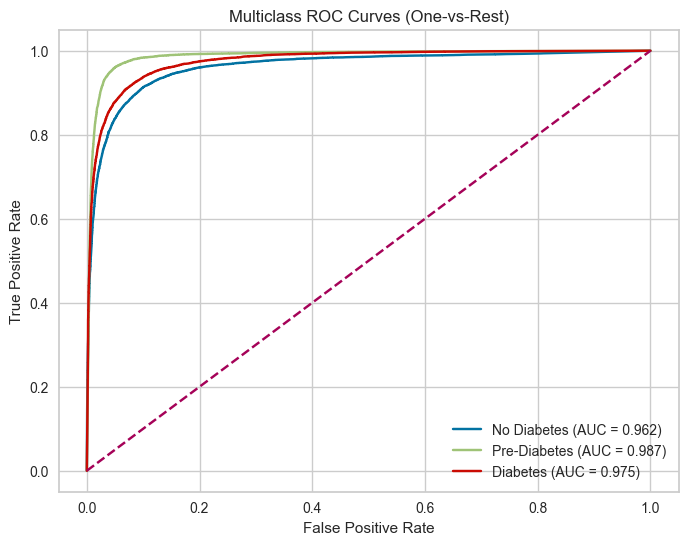

AUC for each class:
Diabetes: 0.962
Diabetes: 0.987
Diabetes: 0.975


In [108]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Binarize labels for OvR ROC
y_test_bin2 = label_binarize(y_test2, classes=[0, 1, 2])

# Predicted probabilities
y_prob2 = best_rf2.predict_proba(X_test2)

plt.figure(figsize=(8, 6))

roc_scores2 = []
for i, label in enumerate(['No Diabetes', 'Pre-Diabetes', 'Diabetes']):
    fpr, tpr, _ = roc_curve(y_test_bin2[:, i], y_prob2[:, i])
    roc_auc2 = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc2:.3f})")
    roc_scores2.append(roc_auc2)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

print("AUC for each class:")
for i in range(len(roc_scores2)):
    print(f"{label}: {roc_scores2[i]:.3f}")

In [109]:
import shap

In [1]:

idx = np.random.choice(X_test2.shape[0], 10, replace=False)
X_shap = X_test2.iloc[idx]


explainer = shap.TreeExplainer(best_rf2)
shap_values = explainer.shap_values(X_shap)


NameError: name 'np' is not defined

In [ ]:
# 500–1000 samples is MORE than enough
X_shap = X_test2.sample(n=5000, random_state=42)

explainer = shap.TreeExplainer(best_rf2)
shap_values = explainer.shap_values(X_shap)


In [ ]:
shap.summary_plot(
    shap_values[2],
    X_test2,
    plot_type="bar",
    max_display=15
)


In [ ]:
shap.summary_plot(
    shap_values[2],
    X_test2,
    max_display=15
)


In [ ]:
# Explain one patient
idx = 0
shap.force_plot(
    explainer.expected_value[2],
    shap_values[2][idx],
    X_test2.iloc[idx],
    matplotlib=True
)
